In [ ]:
# connect to google drive
# follow the instructions

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set file path, incase any issues 

%cd /content/drive/MyDrive/StartSteps/notebooks

/content/drive/MyDrive/StartSteps/notebooks


**Goals**:
* Explore the data
* Visualize the data
* Activity: What conclusions can we make from the data?



Please try not to get overwhelmed by the code. It's there to help us slice and dice the data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import the libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# read the .pkl file

online_retail_history = pd.read_pickle("../data/online_history_cleaned.pkl")


In [ ]:
online_retail_history = pd.read_pickle("../data/online_history_cleaned.pkl")

In [ ]:
# preview the data

online_retail_history.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
# check shape of the data

online_retail_history.shape

# is this the same as the file we saved?

(397925, 8)

In [ ]:
print("Number of customers:", len(online_retail_history.CustomerID.unique()))


Number of customers: 4339


In [ ]:
# mostt popular item description

list(online_retail_history[online_retail_history.StockCode == '85123A'].Description.unique())

['CREAM HANGING HEART T-LIGHT HOLDER']

In [ ]:
print("\n The most expensive stock (pounds):", online_retail_history.Price.max())


 The most expensive purchase (pounds): 8142.75


In [ ]:
print("\n The least expensive stock (pounds):", online_retail_history.Price.min())


 The least expensive stock (pounds): 0.0


### Exploring the data

In [ ]:
# Let's start with some basic exploratory data analysis

print("# of unique invoices:", len(online_retail_history.Invoice.unique()))
print("# of unique Stock codes:", len(online_retail_history.StockCode.unique()))
print("# of Customers:", len(online_retail_history.CustomerID.unique()))
print("# of Geographical Locations:", len(online_retail_history.Country.unique()))

print("\n The most expensive product Price:", online_retail_history.Price.max())
print("The average price of a Product:", round(online_retail_history.Price.mean(), 2))
print("# of Products sold:", online_retail_history.Quantity.sum())


# of unique invoices: 18536
# of unique Stock codes: 3665
# of Customers: 4339
# of Geographical Locations: 37

 The most expensive product Price: 8142.75
The average price of a Product: 3.12
# of Products sold: 5181697


In [ ]:
# Another handy way to look at numerical data, is to use the describe function

online_retail_history.describe()

,Quantity,Price
count,397925.000000,397925.000000
mean,13.021793,3.116212
std,180.419984,22.096773
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
online_retail_history.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8343
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
# Q1. What is the geographical distribution of orders (based on invoices)?
# We could also do this in sql, but we let's use python for this task 

online_retail_history.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8343
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
online_retail_history.Country.value_counts().nlargest(n = 10)

United Kingdom    354345
Germany             9042
France              8343
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: Country, dtype: int64

In [ ]:
# Q2. What are the top ten most popular geographical locations?

online_retail_history.Country.value_counts().nlargest(n = 10);

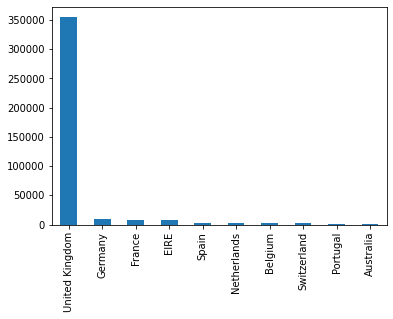

In [ ]:
online_retail_history.Country.value_counts().nlargest(n = 10).plot(kind = 'bar');

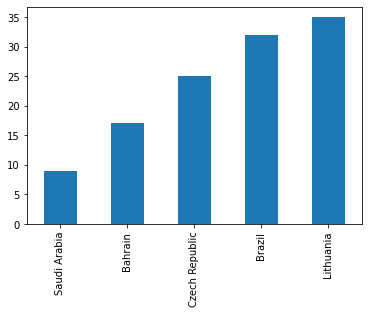

In [ ]:
online_retail_history.Country.value_counts().nsmallest(n = 5).plot(kind = 'bar');

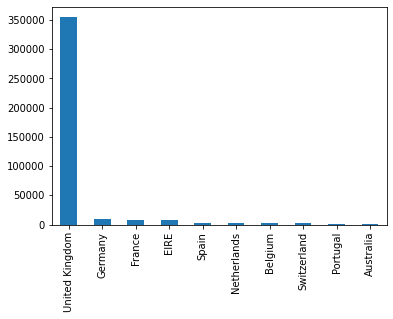

In [ ]:
# Q2.1 Plot the top ten most popular geographical locations?

online_retail_history.Country.value_counts().nlargest(n = 10).plot(kind = 'bar');

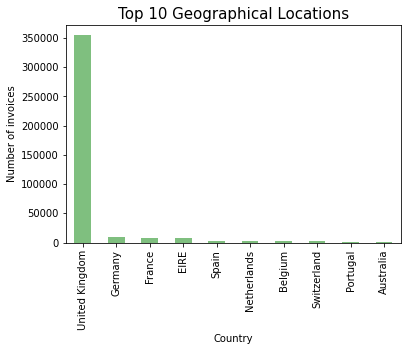

In [ ]:
# Tidy up the plot

online_retail_history.Country.value_counts().nlargest(n = 10).plot(kind = 'bar', color = 'green', alpha = 0.5)
plt.title("Top 10 Geographical Locations", size = 15)
plt.xlabel("Country")
plt.ylabel("Number of invoices")
# plt.xticks(rotation = 90, size = 11)
plt.show();

In [ ]:
# Q3. What are the top ten least popular geographical locations?

online_retail_history.Country.value_counts().nsmallest(n = 10)

Saudi Arabia              9
Bahrain                  17
Czech Republic           25
Brazil                   32
Lithuania                35
Lebanon                  45
RSA                      58
European Community       60
United Arab Emirates     68
Malta                   112
Name: Country, dtype: int64

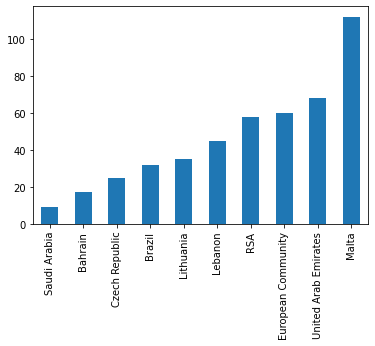

In [ ]:
# Q3.1 Visualize the top 10 least popular geographical locations

online_retail_history.Country.value_counts().nsmallest(n = 10).plot(kind = 'bar');

In [ ]:
# Q4. What is the distribution of total quantity of stock by country?
# Is it the same as the number of invoice?

online_retail_history.groupby("Country").sum()["Quantity"].sort_values(ascending = False)

Country
United Kingdom          4269472
Netherlands              200937
EIRE                     140525
Germany                  119263
France                   111473
Australia                 84209
Sweden                    36083
Switzerland               30083
Spain                     27951
Japan                     26016
Belgium                   23237
Norway                    19338
Portugal                  16122
Finland                   10704
Channel Islands            9491
Denmark                    8235
Italy                      8112
Cyprus                     6361
Singapore                  5241
Austria                    4881
Israel                     4046
Poland                     3684
Canada                     2763
Iceland                    2458
USA                        2458
Unspecified                1789
Greece                     1557
United Arab Emirates        982
Malta                       970
Czech Republic              671
Lithuania                   652


In [ ]:
# Q4.1 Top 10 Countries by Quantity

online_retail_history.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(n = 10)

Country
United Kingdom    4269472
Netherlands        200937
EIRE               140525
Germany            119263
France             111473
Australia           84209
Sweden              36083
Switzerland         30083
Spain               27951
Japan               26016
Name: Quantity, dtype: int64

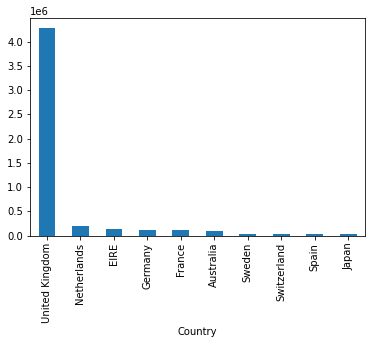

In [ ]:
# Visualizing the top 10 Countries by Quantity

online_retail_history.groupby("Country").sum()["Quantity"].sort_values(ascending = False).head(n = 10).plot(kind = 'bar');

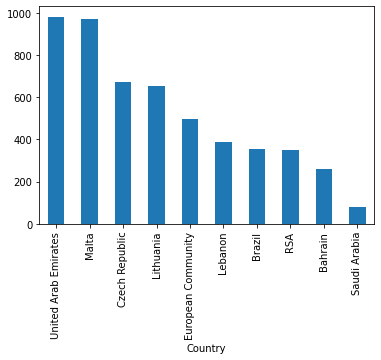

In [ ]:
# Q4.2  Visualizing the lowest 10 Countries by Quantity

online_retail_history.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(n = 10).plot(kind = 'bar');

In [ ]:
online_retail_history.groupby("Country").mean()['Price'].sort_values(ascending = False)

Country
Singapore               58.333288
Canada                   6.030331
Portugal                 5.925472
Cyprus                   5.710391
Lebanon                  5.387556
Finland                  5.296993
Norway                   5.282155
Malta                    4.867768
European Community       4.830000
Italy                    4.717955
Bahrain                  4.644118
Greece                   4.574414
Channel Islands          4.531618
Brazil                   4.456250
EIRE                     4.445880
France                   4.416881
RSA                      4.277586
Austria                  4.256030
Poland                   4.173364
Spain                    3.824684
Sweden                   3.760067
Germany                  3.708487
Israel                   3.646935
Belgium                  3.630158
Switzerland              3.468659
United Arab Emirates     3.380735
Unspecified              3.200820
Denmark                  3.146184
Czech Republic           3.130800
Austra

In [ ]:
# Q5. What is average price of Stock by country?

online_retail_history.groupby("Country").mean()["Price"].sort_values(ascending = False)

Country
Singapore               58.333288
Canada                   6.030331
Portugal                 5.925472
Cyprus                   5.710391
Lebanon                  5.387556
Finland                  5.296993
Norway                   5.282155
Malta                    4.867768
European Community       4.830000
Italy                    4.717955
Bahrain                  4.644118
Greece                   4.574414
Channel Islands          4.531618
Brazil                   4.456250
EIRE                     4.445880
France                   4.416881
RSA                      4.277586
Austria                  4.256030
Poland                   4.173364
Spain                    3.824684
Sweden                   3.760067
Germany                  3.708487
Israel                   3.646935
Belgium                  3.630158
Switzerland              3.468659
United Arab Emirates     3.380735
Unspecified              3.200820
Denmark                  3.146184
Czech Republic           3.130800
Austra

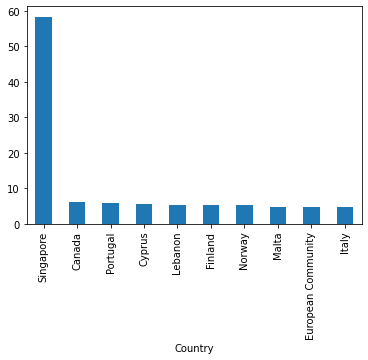

In [ ]:
# Q6. Visualize the top 10 Countries by average price?

online_retail_history.groupby("Country").mean()["Price"].sort_values(ascending = False).head(n = 10).plot(kind = 'bar');

# Discussion: Why is Singapore so much more expensive than other countries?
# Is this a data error? Is there an issue with the currency?

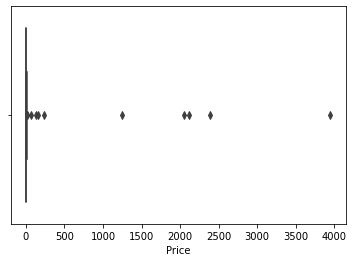

In [ ]:
singapore_data = online_retail_history[online_retail_history.Country == 'Singapore']
sns.boxplot(x = singapore_data['Price']);

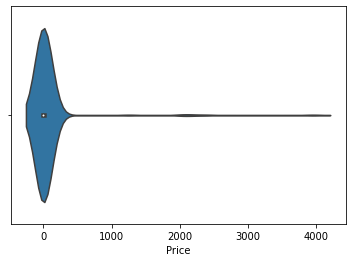

In [ ]:
sns.violinplot(x = singapore_data['Price']);

In [ ]:
singapore_data['Price'].describe()

count     222.000000
mean       58.333288
std       373.926856
min         0.190000
25%         1.250000
50%         2.100000
75%         4.150000
max      3949.320000
Name: Price, dtype: float64

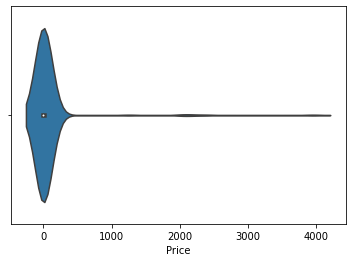

In [ ]:
# Q7. Go deeper into the data; what is the distribution of the Price in Singapore?
# I am sure we are all getting bored of plotting bar charts by this point

# Option 1: Using a Violinplot. Violin plots are great ways of summarizing the distribution of the data - we can see the range of the data 
# and where the majority values lie.

sns.violinplot(x = online_retail_history[online_retail_history.Country == 'Singapore']['Price']);

In [ ]:
# Option 2: Use the describe function. Sometime easier to read than a plot. 
# Compre mean and median.

online_retail_history[online_retail_history.Country == 'Singapore']['Price'].describe()

# Question: How is this comparable to other countries?

count     222.000000
mean       58.333288
std       373.926856
min         0.190000
25%         1.250000
50%         2.100000
75%         4.150000
max      3949.320000
Name: Price, dtype: float64

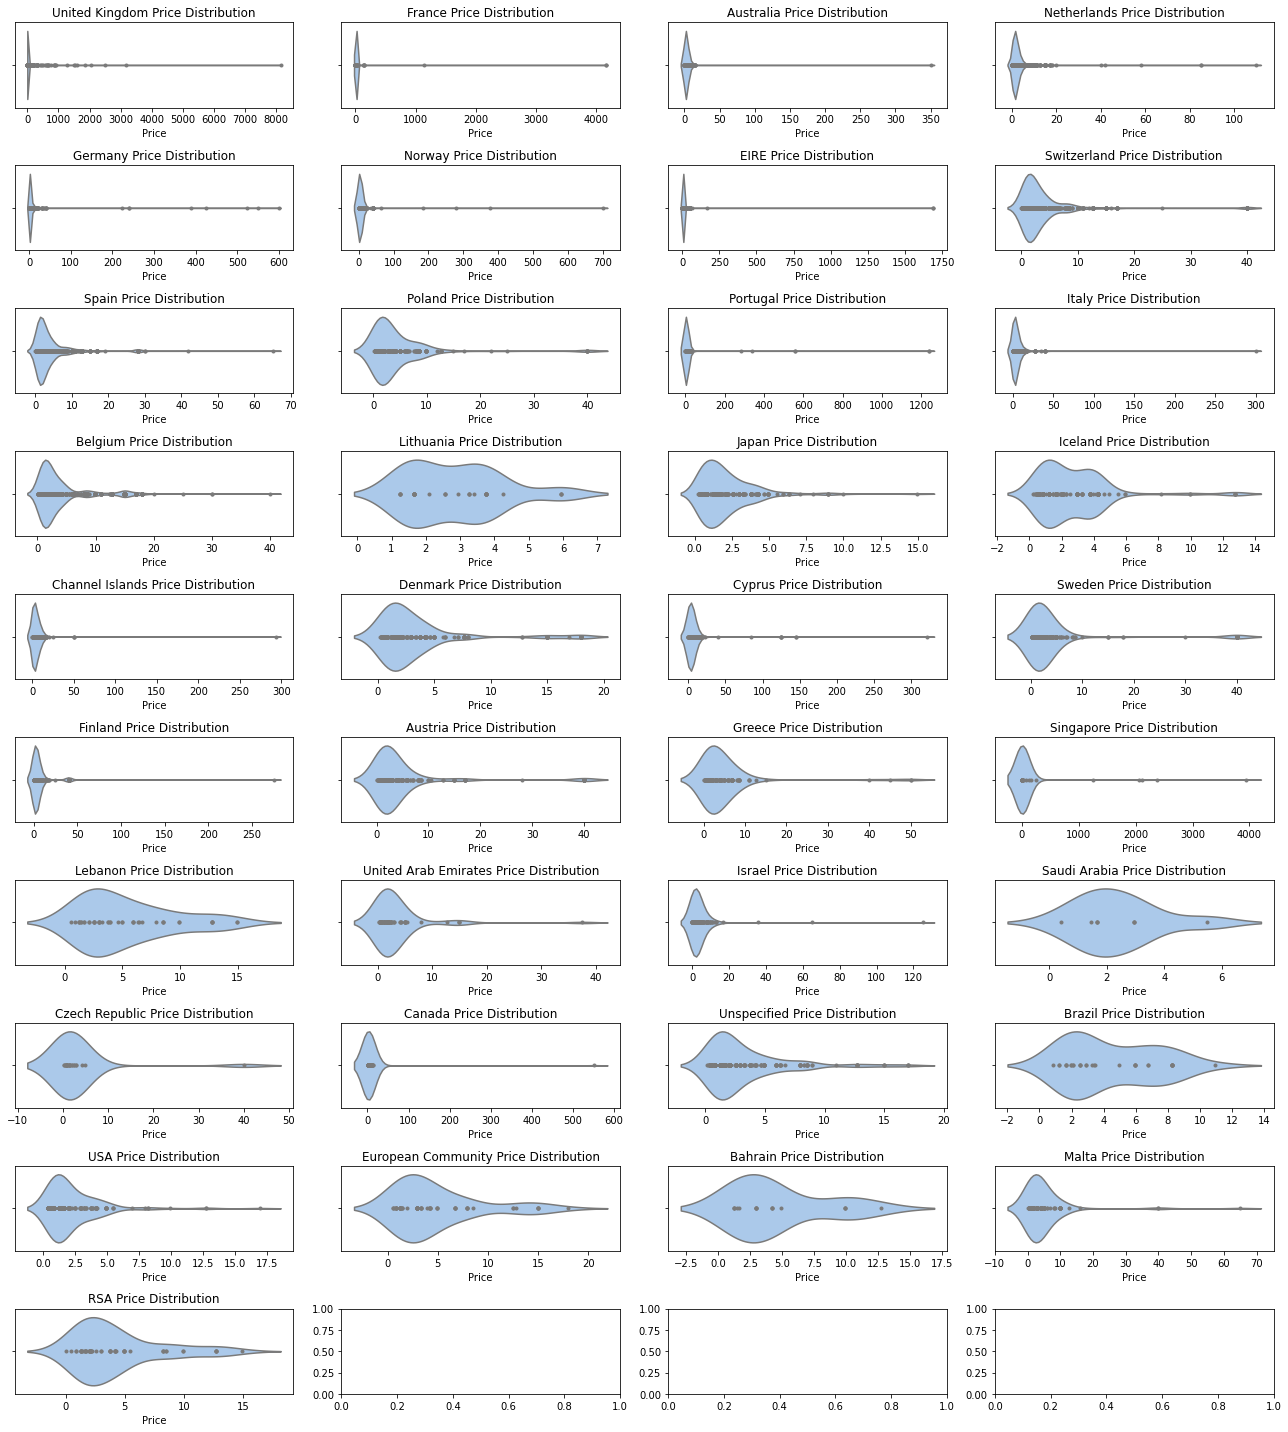

In [ ]:
# Q8. What is the distribution of Price per country?

# Don't be afraid by the code, easy way of looking at all the countries in 

countries = online_retail_history["Country"].unique() # extracting unique country names

# plotting the violin plot for the data
fig, ax = plt.subplots(10, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = online_retail_history[online_retail_history["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

In [ ]:
# check the distribution of UK - 360k invoices vs 210 invoices. 
# The average price for Singapore is influenced by extreme values.

online_retail_history[online_retail_history.Country == 'United Kingdom']['Price'].describe()

# Question: What would be a better way to calculate average price?

count    354345.000000
mean          2.963793
std          17.862067
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: Price, dtype: float64

Observations:
* UK has the highest prices, why is the average so low?

* We also spot there's a country called Unspecified.

* Anything else?

In [ ]:
# how many Unspecied countries do we have?

online_retail_history[online_retail_history.Country == 'Unspecified'].shape[0]

244

In [ ]:
# Q9. What are the Top 15 Invoices with average prices sorted from high to low

online_retail_history.groupby("Description").mean()['Price']

Description
 4 PURPLE FLOCK DINNER CANDLES       2.324359
 DOLLY GIRL BEAKER                   1.243841
 I LOVE LONDON MINI RUCKSACK         4.138732
 NINE DRAWER OFFICE TIDY            14.791935
 OVAL WALL MIRROR DIAMANTE           9.684167
                                      ...    
ZINC T-LIGHT HOLDER STARS SMALL      0.836975
ZINC TOP  2 DOOR WOODEN SHELF       16.950000
ZINC WILLIE WINKIE  CANDLE STICK     0.872344
ZINC WIRE KITCHEN ORGANISER          7.175000
ZINC WIRE SWEETHEART LETTER TRAY     3.454000
Name: Price, Length: 3628, dtype: float64

In [ ]:
online_retail_history.groupby("Description").mean().sort_values(by = "Price", ascending = False).head(15)['Price']

Description
DOTCOM POSTAGE                        744.147500
RUSTIC  SEVENTEEN DRAWER SIDEBOARD    158.076923
REGENCY MIRROR WITH SHUTTERS          156.428571
VINTAGE BLUE KITCHEN CABINET          146.750000
VINTAGE RED KITCHEN CABINET           143.421053
CHEST NATURAL WOOD 20 DRAWERS         118.076923
LOVE SEAT ANTIQUE WHITE METAL         114.024390
VINTAGE POST OFFICE CABINET            66.360000
SCHOOL DESK AND CHAIR                  63.915385
DECORATIVE HANGING SHELVING UNIT       59.950000
CARRIAGE                               50.135338
BLUE PAINTED KASHMIRI CHAIR            49.950000
HALL CABINET WITH 3 DRAWERS            45.635000
CINDERELLA CHANDELIER                  43.011364
PINK PAINTED KASHMIRI CHAIR            42.950000
Name: Price, dtype: float64

In [ ]:
online_retail_history.Description.value_counts()

CREAM HANGING HEART T-LIGHT HOLDER    2035
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
Unknown Stock                         1457
ASSORTED COLOUR BIRD ORNAMENT         1408
                                      ... 
PINK CHRISTMAS FLOCK DROPLET             1
AMBER GLASS/SHELL/PEARL NECKLACE         1
WHITE ANEMONE ARTIFICIAL FLOWER          1
PINK DAISY BAG CHARM                     1
FUNKY MONKEY MUG                         1
Name: Description, Length: 3628, dtype: int64

In [ ]:
online_retail_history.groupby("Description").sum()['Quantity'].sort_values(ascending = False)

Description
PAPER CRAFT , LITTLE BIRDIE          80995
MEDIUM CERAMIC TOP STORAGE JAR       77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS    54415
POPCORN HOLDER                       49183
JUMBO BAG RED RETROSPOT              46181
                                     ...  
PURPLE CHUNKY GLASS+BEAD NECKLACE        1
CRACKED GLAZE EARRINGS BROWN             1
CAPIZ CHANDELIER                         1
POTTING SHED SOW 'N' GROW SET            1
BLACK DROP EARRINGS W LONG BEADS         1
Name: Quantity, Length: 3628, dtype: int64

In [ ]:
# Q10. What is the most popular product that has been purchased so far?

online_retail_history.groupby("Description").sum()['Quantity']

Description
 4 PURPLE FLOCK DINNER CANDLES       140
 DOLLY GIRL BEAKER                  2398
 I LOVE LONDON MINI RUCKSACK         361
 NINE DRAWER OFFICE TIDY              55
 OVAL WALL MIRROR DIAMANTE           122
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     4894
ZINC TOP  2 DOOR WOODEN SHELF         10
ZINC WILLIE WINKIE  CANDLE STICK    2607
ZINC WIRE KITCHEN ORGANISER           25
ZINC WIRE SWEETHEART LETTER TRAY      80
Name: Quantity, Length: 3628, dtype: int64

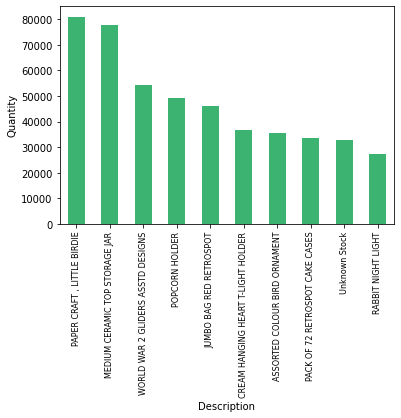

In [ ]:
online_retail_history.groupby("Description").sum().sort_values(by = "Quantity", ascending = False).head(10)["Quantity"].plot(kind = "bar", color = 'mediumseagreen')
plt.xticks(size = 8)
plt.ylabel("Quantity");

In [ ]:
popcorn_holder_UK_EIRE = online_retail_history[(online_retail_history.Country.isin(['UK', 'EIRE'])) & (online_retail_history.Description == 'POPCORN HOLDER')]
popcorn_holder_UK_EIRE

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,Day,DayOfWeek,Year,Month
19775,538009,22197,36,2010-12-09 12:17:00,0.85,u14911,EIRE,POPCORN HOLDER,9,Thursday,2010,12
39297,539722,22197,24,2010-12-21 13:45:00,0.85,u14911,EIRE,POPCORN HOLDER,21,Tuesday,2010,12
96894,544690,22197,400,2011-02-23 08:48:00,0.72,u14156,EIRE,POPCORN HOLDER,23,Wednesday,2011,2
107442,545657,22197,12,2011-03-04 14:02:00,0.85,u14911,EIRE,POPCORN HOLDER,4,Friday,2011,3
116587,546520,22197,100,2011-03-14 12:28:00,0.72,u14911,EIRE,POPCORN HOLDER,14,Monday,2011,3
130947,547789,22197,12,2011-03-25 12:04:00,0.85,u14911,EIRE,POPCORN HOLDER,25,Friday,2011,3
140086,548664,22197,12,2011-04-01 14:45:00,0.85,u14911,EIRE,POPCORN HOLDER,1,Friday,2011,4
149340,549667,22197,12,2011-04-11 12:20:00,0.85,u14911,EIRE,POPCORN HOLDER,11,Monday,2011,4
190941,553686,22197,72,2011-05-18 13:58:00,0.85,u14911,EIRE,POPCORN HOLDER,18,Wednesday,2011,5
200894,554770,22197,24,2011-05-26 11:40:00,0.85,u14911,EIRE,POPCORN HOLDER,26,Thursday,2011,5


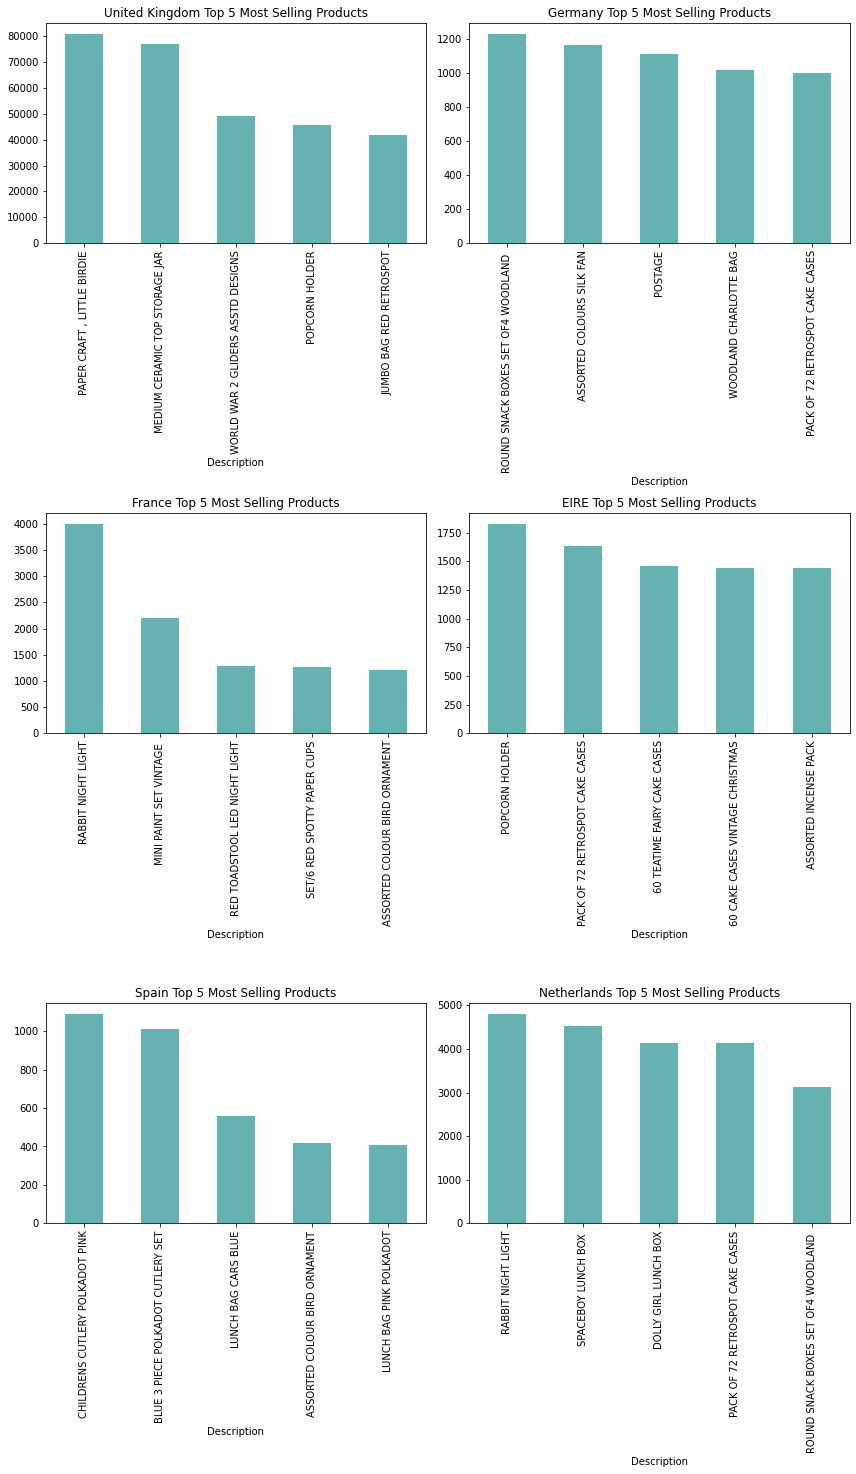

In [ ]:
# Bonus. Most popular product by country

countries_of_interest = ["United Kingdom", "Germany", "France", "EIRE", "Spain", "Netherlands"] # list of countries interested in
temp = pd.DataFrame(online_retail_history.groupby(["Country", "Description"]).sum()["Quantity"])

x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(countries_of_interest):
    ax = plt.subplot(4, 2, x + 1)
    plt.title(c + ' '+ "Top 5 Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

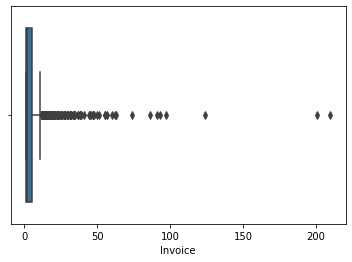

In [ ]:
# Q11. How many invoices does the user have on average?

customer_invoices = pd.DataFrame(online_retail_history.groupby(['CustomerID']).nunique()['Invoice'])
sns.boxplot(x = customer_invoices['Invoice']);

In [ ]:
customer_invoices['Invoice'].describe()

count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: Invoice, dtype: float64

In [ ]:
print("On average ", round(customer_invoices['Invoice'].mean(), 2))

On average  4.27


In [ ]:
# refresh ourselves, what does the data look like

online_retail_history.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
# Q12. How many invoices per month do we have? 
# Do you remember this questions from the first section?

# Create a month variable
online_retail_history['Month'] = online_retail_history.InvoiceDate.dt.month

# Use the groupby function to count the number of unique invoices per month
online_retail_history.groupby(['Month']).nunique()['Invoice']


Month
1      987
2      998
3     1321
4     1149
5     1555
6     1393
7     1331
8     1281
9     1756
10    1929
11    2658
12    2178
Name: Invoice, dtype: int64

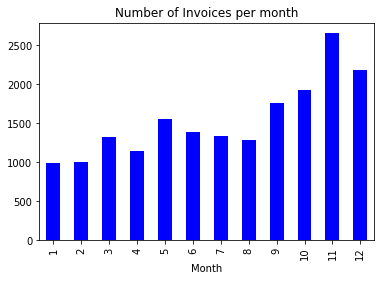

In [ ]:
# we can also plot this

online_retail_history.groupby(['Month']).nunique()['Invoice'].plot(kind = 'bar', color = 'blue')
plt.title("Number of Invoices per month");

# seems to be a spike towards the end of the year - does this tie in with xmas shopping?

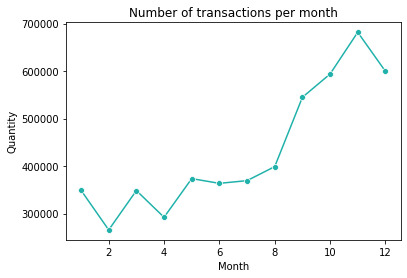

In [ ]:
# Q13. How many transactions do we have per month?

# Use the groupby function to sum the quantity and group by invoices per month
trans_per_month = pd.DataFrame(online_retail_history.groupby(['Month']).sum()['Quantity'])

sns.lineplot(x = "Month", y = "Quantity", data = trans_per_month, marker = "o", color = "lightseagreen")
plt.title("Number of transactions per month");

# Question. Is there a difference in the distribution?

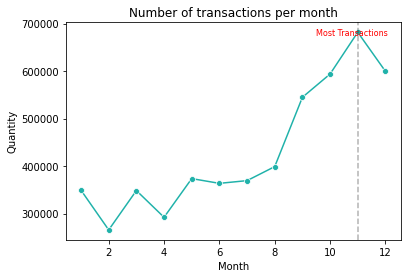

In [ ]:
# we could even add a marker to show which month has the highest number

# plt.figure(figsize=(7 , 5))
sns.lineplot(x = "Month", y = "Quantity", data = trans_per_month, marker = "o", color = "lightseagreen")
plt.title("Number of transactions per month");
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(9.5, 675000, "Most Transactions", size = 8, color = 'red');


In [ ]:
popcorn_holder_UK_EIRE = online_retail_history[(online_retail_history.Country.isin(['United Kingdom', 'EIRE'])) & (online_retail_history.Description == 'POPCORN HOLDER')]
popcorn_holder_UK_EIRE


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,Day,DayOfWeek,Year,Month
219,536390,22197,100,2010-12-01 10:19:00,0.72,u17511,United Kingdom,POPCORN HOLDER,1,Wednesday,2010,12
384,536404,22197,36,2010-12-01 11:29:00,0.85,u16218,United Kingdom,POPCORN HOLDER,1,Wednesday,2010,12
523,536409,22197,2,2010-12-01 11:45:00,0.85,u17908,United Kingdom,POPCORN HOLDER,1,Wednesday,2010,12
601,536412,22197,5,2010-12-01 11:49:00,0.85,u1792,United Kingdom,POPCORN HOLDER,1,Wednesday,2010,12
795,536464,22197,5,2010-12-01 12:23:00,0.85,u17968,United Kingdom,POPCORN HOLDER,1,Wednesday,2010,12
...,...,...,...,...,...,...,...,...,...,...,...,...
529386,581453,22197,100,2011-12-08 18:15:00,0.72,u16401,United Kingdom,POPCORN HOLDER,8,Thursday,2011,12
529472,581458,22197,1500,2011-12-08 18:45:00,0.72,u17949,United Kingdom,POPCORN HOLDER,8,Thursday,2011,12
529473,581459,22197,1200,2011-12-08 18:46:00,0.72,u17949,United Kingdom,POPCORN HOLDER,8,Thursday,2011,12
531057,581538,22197,4,2011-12-09 11:34:00,0.85,u14446,United Kingdom,POPCORN HOLDER,9,Friday,2011,12


In [ ]:
trans_per_month = pd.DataFrame(popcorn_holder_UK_EIRE.groupby(['Month', 'Country']).sum()['Quantity'])
trans_per_month

# # plt.figure(figsize=(7 , 5))
# sns.lineplot(x = "Month", y = "Quantity", data = trans_per_month, marker = "o", color = "lightseagreen")
# plt.title("Number of transactions per month");
# plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
# plt.text(9.5, 675000, "Most Transactions", size = 8, color = 'red');




Quantity
Month Country                 
1     United Kingdom      1563
2     EIRE                 400
      United Kingdom      2081
3     EIRE                 124
      United Kingdom      1742
4     EIRE                  24
      United Kingdom      1593
5     EIRE                  96
      United Kingdom      6618
6     EIRE                  36
      United Kingdom      1883
7     EIRE                 108
      United Kingdom      1663
8     EIRE                 132
      United Kingdom      5100
9     EIRE                  84
      United Kingdom      3432
10    EIRE                 572
      United Kingdom      4909
11    EIRE                  96
      United Kingdom      8036
12    EIRE                 156
      United Kingdom      7012

In [ ]:
popcorn_holder_UK_EIRE.Country.value_counts()

EIRE    34
Name: Country, dtype: int64

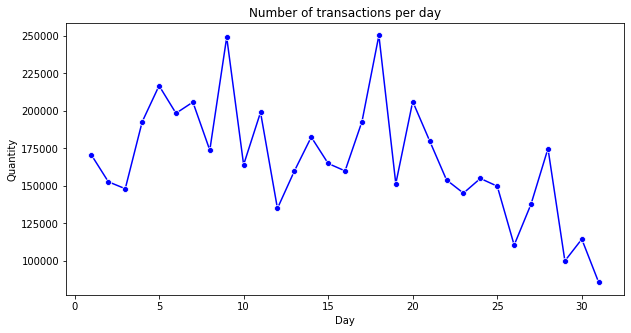

In [ ]:
# Q14. What is the distribution of transactions per day?

# Create a day variable
online_retail_history['Day'] = online_retail_history.InvoiceDate.dt.day

# Use the groupby function to sum the quantity and group by invoices per day
trans_per_day = pd.DataFrame(online_retail_history.groupby(['Day']).sum()['Quantity'])

plt.figure(figsize=(10 , 5))
sns.lineplot(x = "Day", y = "Quantity", data = trans_per_day, marker = "o", color = "blue")
plt.title("Number of transactions per day");
# plt.axvline(5, color = 'k', linestyle = "dotted");

In [ ]:
# Q15. What is the distribution of transactions per day of week?

# Create a day of week variable
online_retail_history["DayOfWeek"] = online_retail_history.InvoiceDate.dt.dayofweek
 
# Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

online_retail_history["DayOfWeek"] = online_retail_history["DayOfWeek"].map(dayofweek_mapping)

online_retail_history["DayOfWeek"].value_counts()

Thursday     80052
Wednesday    68888
Tuesday      66476
Monday       64899
Sunday       62775
Friday       54835
Name: DayOfWeek, dtype: int64

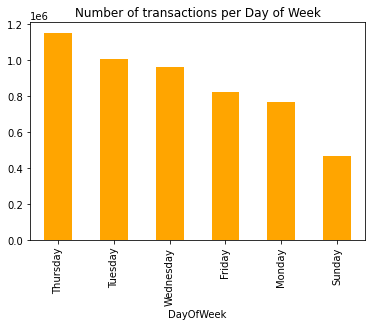

In [ ]:
online_retail_history.groupby("DayOfWeek").sum().sort_values(by = "Quantity", ascending = False)["Quantity"].plot(kind = "bar", color = "orange")
plt.title("Number of transactions per Day of Week");

In [ ]:
germany_customers = online_retail_history[online_retail_history.Country == 'Germany']
germany_customers

# online_retail_history.groupby("DayOfWeek").sum().sort_values(by = "Quantity", ascending = False)["Quantity"].plot(kind = "bar", color = "orange")
# plt.title("Number of transactions per Day of Week");

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,Day,DayOfWeek
1099,536527,22809,6,2010-12-01 13:04:00,2.95,u12662,Germany,SET OF 6 T-LIGHTS SANTA,1,Wednesday
1100,536527,84347,6,2010-12-01 13:04:00,2.55,u12662,Germany,ROTATING SILVER ANGELS T-LIGHT HLDR,1,Wednesday
1101,536527,84945,12,2010-12-01 13:04:00,0.85,u12662,Germany,MULTI COLOUR SILVER T-LIGHT HOLDER,1,Wednesday
1102,536527,22242,12,2010-12-01 13:04:00,1.65,u12662,Germany,5 HOOK HANGER MAGIC TOADSTOOL,1,Wednesday
1103,536527,22244,12,2010-12-01 13:04:00,1.95,u12662,Germany,3 HOOK HANGER MAGIC GARDEN,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...
531177,581578,22993,12,2011-12-09 12:16:00,1.25,u12713,Germany,SET OF 4 PANTRY JELLY MOULDS,9,Friday
531178,581578,22907,12,2011-12-09 12:16:00,0.85,u12713,Germany,PACK OF 20 NAPKINS PANTRY DESIGN,9,Friday
531179,581578,22908,12,2011-12-09 12:16:00,0.85,u12713,Germany,PACK OF 20 NAPKINS RED APPLES,9,Friday
531180,581578,23215,12,2011-12-09 12:16:00,2.08,u12713,Germany,JINGLE BELL HEART ANTIQUE SILVER,9,Friday


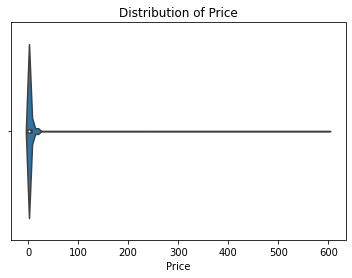

In [ ]:
sns.violinplot(x = germany_customers.Price)
plt.title("Distribution of Price");

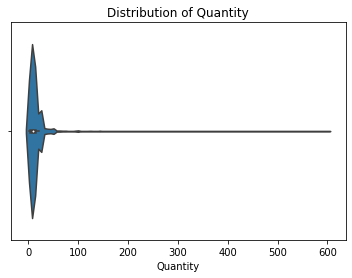

In [ ]:
sns.violinplot(x = germany_customers.Quantity);
plt.title("Distribution of Quantity");

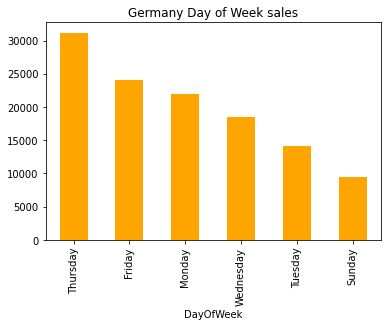

In [ ]:
germany_customers.groupby("DayOfWeek").sum().sort_values(by = "Quantity", ascending = False)["Quantity"].plot(kind = "bar", color = "orange")
plt.title("Germany Day of Week sales");

In [ ]:
# Hint: Create a time and/or quarter variable and plot.


**Activity**:
* It's your turn to explore the data. You can use this and the previous notebook, or you can slice and dice the data yourself using SQL and python.
* Feel free to split into groups, or individually, write and present a short report on the exploration of the data so far.
* What trends have we spotted so far? Which country has the most orders? Which day of week has the most number of transactions? What else could you explore?

In [ ]:
# Reminder what the dataset looks like
# We have some new columns now

online_retail_history.head(n = 5)


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,Invoice_month,Month,Day,DayOfWeek
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,12,12,1,Wednesday
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN,12,12,1,Wednesday
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER,12,12,1,Wednesday
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,12,12,1,Wednesday
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,12,12,1,Wednesday


In [ ]:
# How many items were purchased in 2010

import datetime

online_retail_history['Year'] = online_retail_history.InvoiceDate.dt.year
online_retail_history['Year'].value_counts()


2011    371765
2010     26160
Name: Year, dtype: int64

In [ ]:
online_retail_history.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [ ]:
dec = online_retail_history[(online_retail_history['Month'] == 12)]
dec.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,Description,Day,DayOfWeek,Year,Month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,1,Wednesday,2010,12
1,536365,71053,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,WHITE MOROCCAN METAL LANTERN,1,Wednesday,2010,12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,u1785,United Kingdom,CREAM CUPID HEARTS COAT HANGER,1,Wednesday,2010,12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,1,Wednesday,2010,12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,u1785,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,1,Wednesday,2010,12


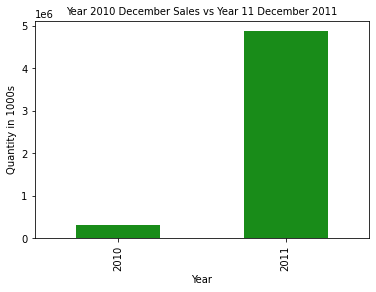

In [ ]:
online_retail_history.groupby(['Year']).sum()['Quantity'].plot(kind = 'bar', color = 'green', alpha = 0.9)
plt.title("Year 2010 December Sales vs Year 11 December 2011", size = 10)
plt.ylabel("Quantity in 1000s");

In [ ]:
# save the dataset for the next notebooks

online_retail_history.to_pickle("../data/online_history_w_new_columns.pkl")

**Don't Cheat**

Some initial insights...

1) Most of the customers are from the United Kingdom followed by the Germany, France & EIRE.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) Our Top 3 Best Selling Products are World War 2 Gliders, Popcorn Holder, Jumbo Red Bag.

5) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

6) It also observed that in the end of the 1st week, people tends to buy more.

7) People loves to shop on Thursday followed by Wednesday and Tuesday.



In [ ]:
# Took inspiration from the following repo: https://github.com/mukulsinghal001/customer-lifetime-prediction-using-python/blob/main/Customer%20Lifetime%20Prediction%20Using%20Probabilistic%20Models%20-%20Midway%20Report.ipynb
